In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from PIL import Image, ImageOps


(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

Using TensorFlow backend.


In [2]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


(28, 28)


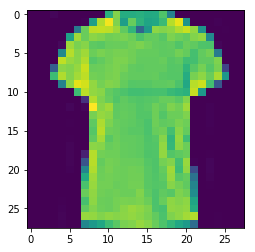

In [3]:
# Show one of the images from the training dataset
plt.imshow(x_train[66])
print(x_train[66].shape)

In [4]:
x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 784) y_train shape: (60000,)
x_test shape: (10000, 784) y_test shape: (10000,)


In [5]:
x_trainnorm=preprocessing.normalize(x_train)
x_testnorm=preprocessing.normalize(x_test)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 784) y_train shape: (60000,)
x_test shape: (10000, 784) y_test shape: (10000,)


In [6]:
x_mult=np.matmul(x_testnorm,np.ndarray.transpose(x_trainnorm))

In [7]:
ranks = np.argsort(x_mult, axis=1)[:,::-1]

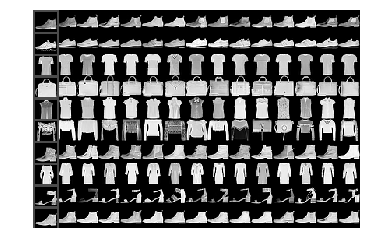

In [10]:
# get the original images for visualization
x_train_images = np.reshape(x_train, (60000, 28, 28))
x_test_images = np.reshape(x_test, (10000, 28, 28))

h,w = (28, 28)
new_image= Image.new('RGB', (h*15,w*10))

# Visualize ranks of the 10 queries
offset = 900 # it will show results from query #'offset' to #offset+10
for q in range(10):
  ranks_q = ranks[q*(offset+1),:]
  for i in range(15):
      new_image.paste( Image.fromarray(x_train_images[ranks_q[i]]), (h*(1+i),w*q ))

  # visualize query
  ima_q = Image.fromarray(x_test_images[q*(offset+1),...])
  ima_q = ImageOps.expand(ima_q, border=3, fill='green')

  new_image.paste(ima_q, (0,w*q))

plt.imshow(new_image)
plt.axis('off')
plt.show()
